In [1]:
import yfinance as yf
import pandas as pd

In [4]:
nse_pharma_tickers = ["SUNPHARMA.NS","DRREDDY.NS","MANKIND.NS","ALKEM.NS",
                      "APLLTD.NS","ERIS.NS","ABBOTINDIA.NS","FDC.NS","IPCALAB.NS",
                      "AJANTPHARM.NS","INDOCO.NS","CIPLA.NS","ZYDUSLIFE.NS",
                      "TORNTPHARM.NS","LUPIN.NS","GLENMARK.NS","JBCHEPHARM.NS",
                     "SANOFI.NS","BIOCON.NS","GLAXO.NS","PFIZER.NS"]

nse_IT_tickers = ["WIPRO.NS","INFY.NS","TCS.NS"]
nse_other_tickers = ["RELIANCE.NS","ITC.NS","HINDUNILVR.NS"]


corp_name = []
current_ratio = []
debt_equity_ratio = []
pe_ratio = []
revenue = []
operating_margin = []
profit_margin = []
roe=[]

ticker_list = nse_pharma_tickers#+nse_other_tickers+nse_IT_tickers

for ticker in ticker_list:

    # Create a Ticker object
    stock = yf.Ticker(ticker)

    # Get the summary data including P/E ratio
    summary_info = stock.info

    #pe_ratio = round(summary_info.get('trailingPE'),1)

    corp_name.append(summary_info.get('shortName'))
    current_ratio.append(summary_info.get('currentRatio'))
    debt_equity_ratio.append(summary_info.get('debtToEquity'))
    pe_ratio.append(summary_info.get('trailingPE'))
    revenue.append(summary_info.get('totalRevenue'))
    operating_margin.append(summary_info.get('operatingMargins'))
    profit_margin.append(summary_info.get('profitMargins'))
    roe.append(summary_info.get('returnOnEquity'))
    

#check for NaN values & round values in the list
pe_ratio = [0 if pd.isna(item) else round(item,2) for item in pe_ratio]
roe = [0 if pd.isna(item) else round(item*100,2) for item in roe]
current_ratio = [0 if pd.isna(item) else round(item,1) for item in current_ratio]
debt_equity_ratio = [0 if pd.isna(item) else round(item,1) for item in debt_equity_ratio]
revenue = [0 if pd.isna(item) else round(item/10000000,2) for item in revenue]
operating_margin = [0 if pd.isna(item) else round(item*100,2) for item in operating_margin]
profit_margin = [0 if pd.isna(item) else round(item*100,2) for item in profit_margin]

usd_to_inr = 83
usd_to_inr_billion = usd_to_inr * 100

revenue_usd_billion = [0 if pd.isna(item) else round(item/usd_to_inr_billion,2) for item in revenue]


#print(ticker,' ',pe_ratio)

nse_pharma_df = pd.DataFrame({'Corporate Name':corp_name,'Trailing P/E':pe_ratio,'ROE (in %)':roe,
                              'Current Ratio':current_ratio,'Debt/Equity (in %)':debt_equity_ratio,
                              'Revenue (in INR Crore) ttm':revenue, 'Revenue (in USD Billion) ttm':revenue_usd_billion,
                             'Operating Margin (in %) ttm':operating_margin,'Profit Margin (in %)':profit_margin})
    

In [5]:
nse_pharma_df.sort_values(['Revenue (in USD Billion) ttm'],ascending=False).reset_index(drop=True)

,Corporate Name,Trailing P/E,ROE (in %),Current Ratio,Debt/Equity (in %),Revenue (in INR Crore) ttm,Revenue (in USD Billion) ttm,Operating Margin (in %) ttm,Profit Margin (in %)
0,SUN PHARMACEUTICAL,37.08,14.31,2.6,3.1,46304.89,5.58,21.17,18.46
1,DR REDDYS LABS,18.57,22.16,2.6,5.2,26685.40,3.22,23.98,19.07
2,CIPLA LTD,31.12,14.74,3.3,3.8,24340.70,2.93,21.91,14.19
3,ZYDUS LIFESCIENCES,25.54,14.76,2.3,0.9,18776.00,2.26,20.14,14.95
4,LUPIN LTD,48.48,10.69,1.4,28.4,18604.92,2.24,13.40,7.16
5,GLENMARK PHARM,0.00,-0.40,1.9,53.2,13751.01,1.66,10.00,-0.64
6,BIOCON LTD,68.32,4.07,1.4,75.2,13599.90,1.64,10.17,3.67
7,ALKEM LAB LTD,42.19,14.60,2.5,14.1,12351.40,1.49,19.56,11.60
8,TORRENT PHARM,61.49,20.99,1.1,66.9,10233.15,1.23,23.46,13.13
9,Mankind Pharma Limited,76.08,0.00,2.7,2.1,9430.31,1.14,21.64,16.52


In [112]:
yf.Ticker("ITC.NS").info

{'address1': 'Virginia House',
 'address2': '37 Jawaharlal Nehru Road',
 'city': 'Kolkata',
 'zip': '700071',
 'country': 'India',
 'phone': '91 33 2288 9371',
 'fax': '91 33 2288 0655',
 'website': 'https://www.itcportal.com',
 'industry': 'Tobacco',
 'industryKey': 'tobacco',
 'industryDisp': 'Tobacco',
 'sector': 'Consumer Defensive',
 'sectorKey': 'consumer-defensive',
 'sectorDisp': 'Consumer Defensive',
 'longBusinessSummary': 'ITC Limited engages in the fast-moving consumer goods, hotels, paperboards and paper and packaging, agri, and information technology businesses in India and internationally. It primarily offers cigarettes and cigars; staples, spices, biscuits, confectionery and gums, snacks, noodles and pasta, beverages, dairy, ready to eat meals, chocolate, coffee, and frozen foods; personal care products; notebooks, pens and pencils, geometry boxes, erasers, sharpeners, rulers, wax and plastic crayons, sketch pens, and oil pastels; safety matches; and incense sticks unde

In [40]:
data = yf.Ticker('PHARMABEES.NS').history(period="24mo")

In [41]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-11 00:00:00+05:30,14.400000,14.400000,13.850000,13.930000,230016,0.0,0.0
2022-01-12 00:00:00+05:30,13.930000,14.350000,13.790000,13.840000,505086,0.0,0.0
2022-01-13 00:00:00+05:30,14.400000,14.400000,13.810000,14.060000,286429,0.0,0.0
2022-01-14 00:00:00+05:30,14.100000,14.150000,13.920000,14.040000,253331,0.0,0.0
2022-01-17 00:00:00+05:30,14.480000,14.480000,13.860000,13.930000,264466,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-05 00:00:00+05:30,17.780001,17.790001,17.510000,17.639999,4925660,0.0,0.0
2024-01-08 00:00:00+05:30,17.900000,17.900000,17.420000,17.469999,5071776,0.0,0.0
2024-01-09 00:00:00+05:30,17.570000,17.680000,17.500000,17.620001,2535280,0.0,0.0


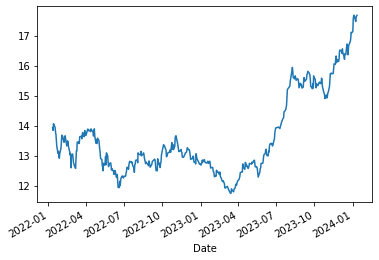

In [42]:
# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the close price of the AAPL
data['Close'].plot()
plt.show()

In [45]:
selected_tickers = ["SUNPHARMA.NS","DRREDDY.NS",
                    "CIPLA.NS","ZYDUSLIFE.NS",
                   "ERIS.NS","SANOFI.NS","PFIZER.NS"]

weights = {
    "SUNPHARMA.NS":25,
    "DRREDDY.NS":20,
    "CIPLA.NS":5,
    "ZYDUSLIFE.NS":15,
    "ERIS.NS":5,
    "SANOFI.NS":20,
    "PFIZER.NS":5
}


[*********************100%%**********************]  7 of 7 completed


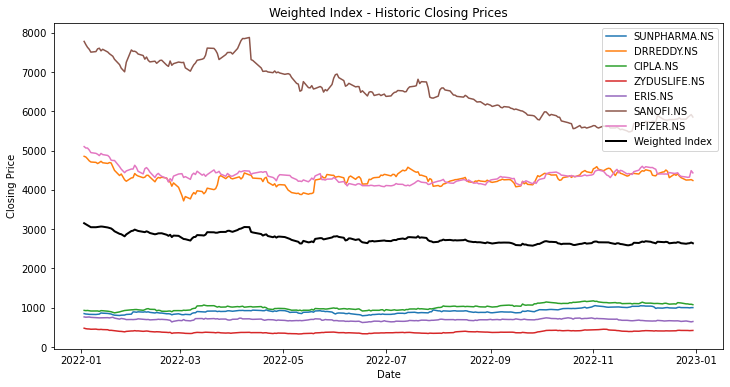

In [46]:

# Fetch historical closing prices
historical_data = yf.download(selected_tickers, start="2022-01-01", end="2022-12-31")['Close']

# Create a DataFrame for weighted index
weighted_index = historical_data.copy()
for ticker in selected_tickers:
    weighted_index[ticker] *= weights[ticker] / 100

# Calculate the index by summing the weighted closing prices
weighted_index["Index"] = weighted_index.sum(axis=1)

# Plot the historic closing price graph
plt.figure(figsize=(12, 6))
for ticker in selected_tickers:
    plt.plot(historical_data.index, historical_data[ticker], label=ticker)

plt.plot(weighted_index.index, weighted_index["Index"], label="Weighted Index", linewidth=2, color='black')
plt.title('Weighted Index - Historic Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

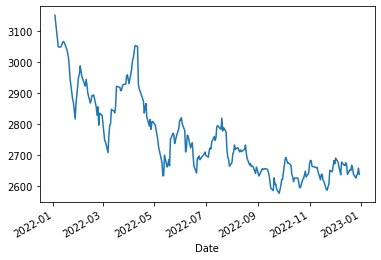

In [48]:
weighted_index["Index"].plot()
plt.show()